In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel("..//result.xlsx", index_col=0)
df["Condition"] = pd.Categorical(df["Condition"], df["Condition"].unique())
df["Condition"] = df["Condition"].cat.rename_categories({0:"Plain", 1:"Demonstration", 2:"Explanation", 3:"Both"})
df["Result"] = pd.Categorical(df["Result"], df["Result"].unique())
df["Result"] = df["Result"].cat.rename_categories({1:"Win", 0:"Loss"})

First group the episodes into bins (think of a histogram, only that we don't summarize directly)

In [8]:
number_of_bins = 100
# boundaries = np.linspace(0, df["Total Examples"].max(), num=number_of_bins)
boundaries = np.linspace(0, 2000, num=number_of_bins)
bin_idx = np.digitize(df["Total Examples"], boundaries)
df["Binned Examples"] = np.round(boundaries[bin_idx-1]).astype(int)

Then show the learning curve using the bins and seaborn

Text(0.5, 0, 'Examples')

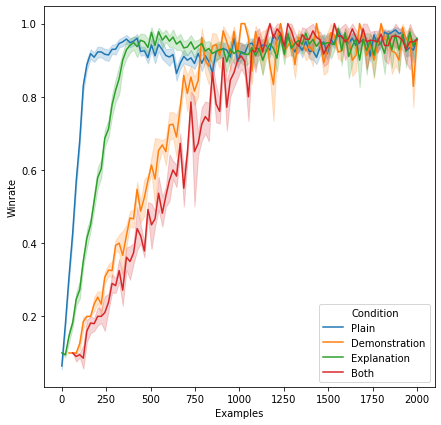

In [9]:
f, ax = plt.subplots(figsize=(7, 7))
sns.lineplot(x="Binned Examples", y="Winrate", hue="Condition", data=df, ax=ax)
ax.set_xlabel("Examples")

<AxesSubplot:xlabel='Winrate', ylabel='Total Examples'>

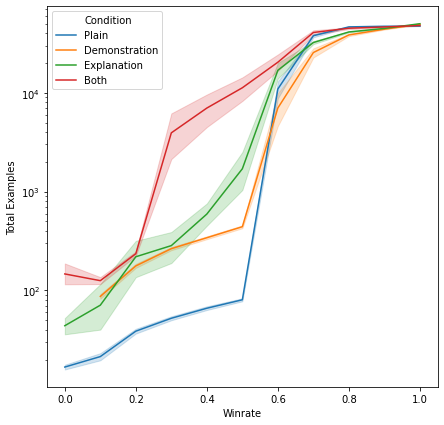

In [18]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(yscale="log")
sns.lineplot(x="Winrate", y="Total Examples", hue="Condition", data=df, ax=ax)

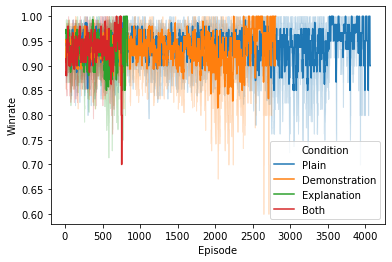

In [92]:
sns.lineplot(y="Winrate", x="Episode", hue="Condition", data=df[df["Episode"] >= 10])